In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
import pickle

In [2]:
df=pd.read_csv("C:\\Users\\91863\\Downloads\\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\91863\Download\Anaconda3-2020.02-Windows-x86_64\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


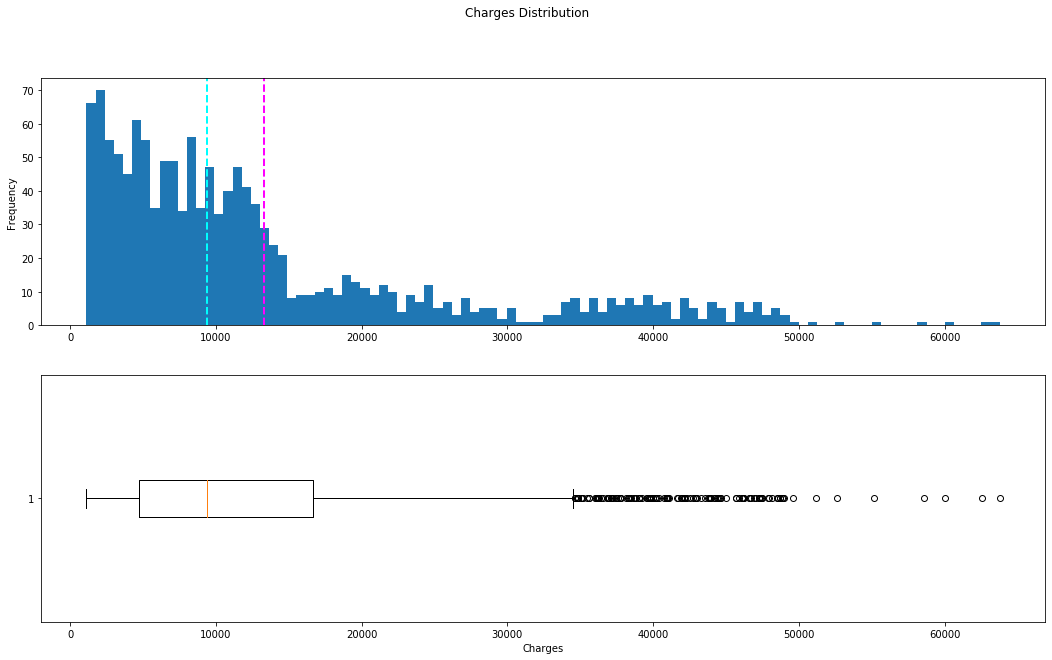

In [5]:
# distribution of label

# Get the label column
label = df['charges']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (18,10))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Charges')

# Add a title to the Figure
fig.suptitle('Charges Distribution')

# Show the figure
fig.show()

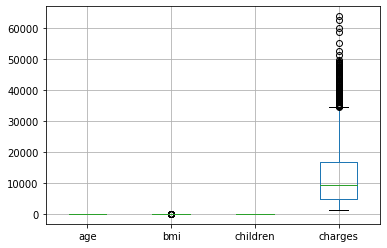

In [6]:
df.boxplot()

In [7]:
# finding the outliers values bmi
outlier_list=boxplot_stats(df.bmi).pop(0)['fliers'].tolist()
print=(outlier_list)
print

## number of rows containg the outliers
outliers_row=df[df.bmi.isin(outlier_list)].shape[0]
print=("number of row contaning outliers in bmi:",outliers_row)
print

## percentage of outliers
percentage=(outliers_row/df.shape[0])*100
print=("percentage:",percentage)
print

('percentage:', 0.672645739910314)

# data transformation

In [8]:
print=('minimum value age:',df['age'].min(),'\nmaximum value for age:',df['age'].max())
print

('minimum value age:', 18, '\nmaximum value for age:', 64)

In [9]:
df.loc[(df['age']>=18)&(df['age']<=40),'age_group']='young'
df.loc[(df['age']>=41)&(df['age']<=58),'age_group']='mid_age'
df.loc[df['age']> 58,'age_group']='old'

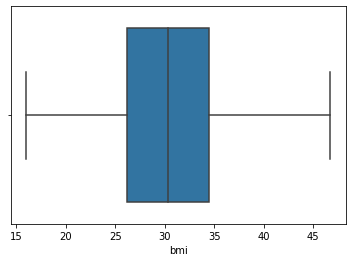

In [10]:
df_clean=df[~df.bmi.isin(outlier_list)]
sns.boxplot(x='bmi',data=df_clean)

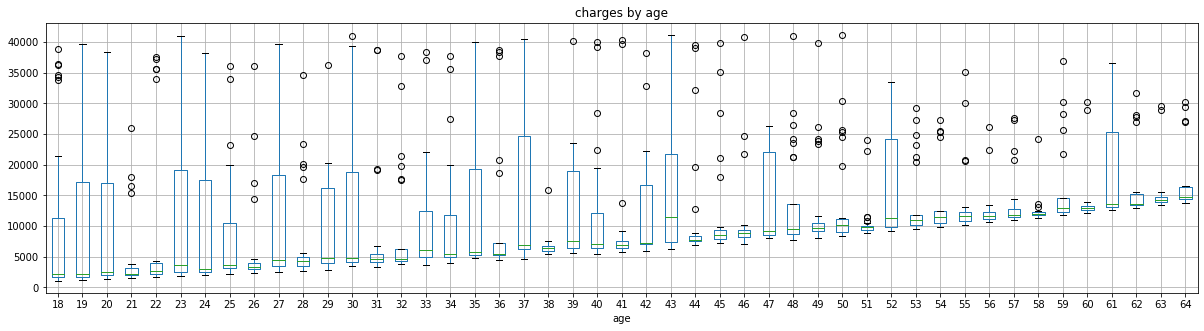

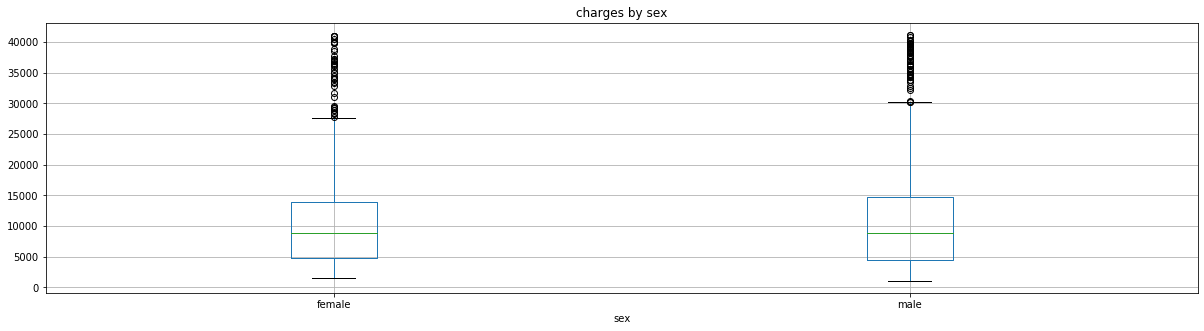

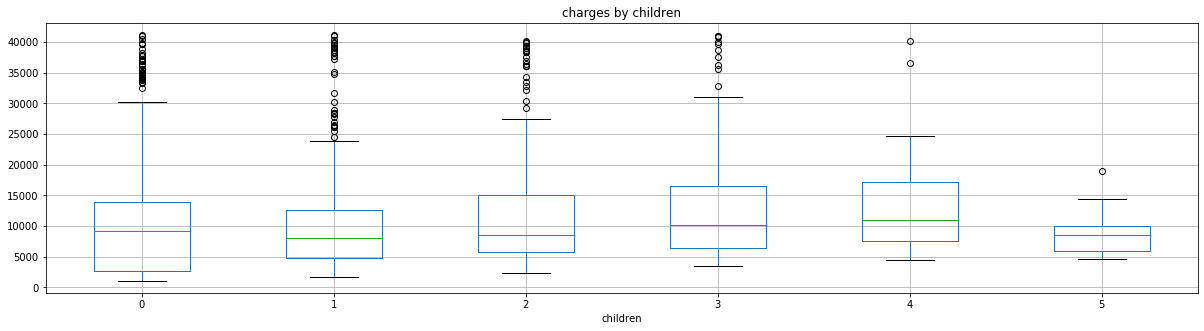

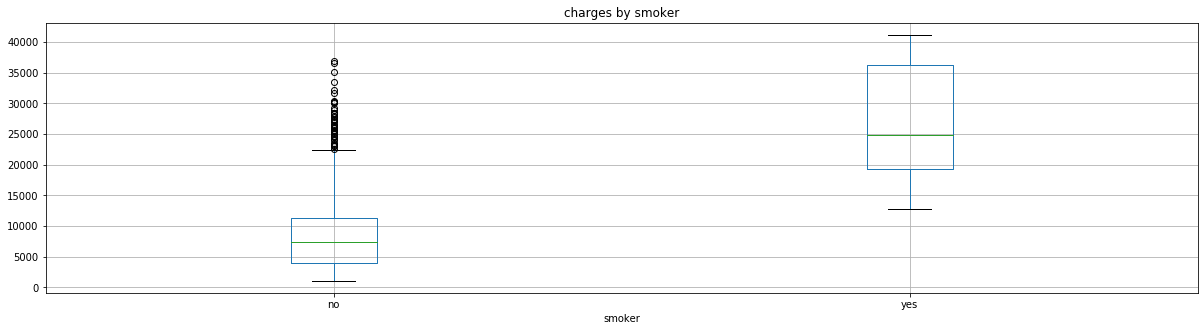

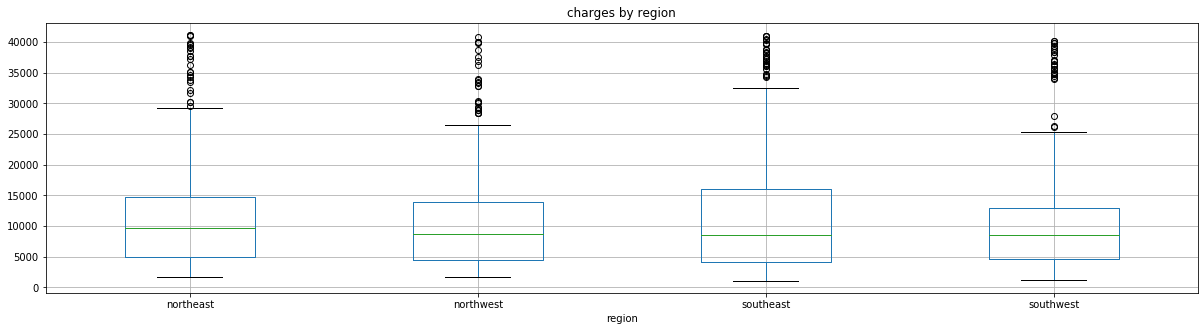

In [11]:
# box_plots

cat_features = ['age','sex','children','smoker','region']
for col in cat_features:
    df_outliers=df.charges.quantile(.95)
    df_outliers_removed = df[df.charges <= df_outliers]
    df_outliers_removed.boxplot('charges',col,figsize=(20,5))
    plt.suptitle('')
    plt.title('charges by '+col)
    plt.show();

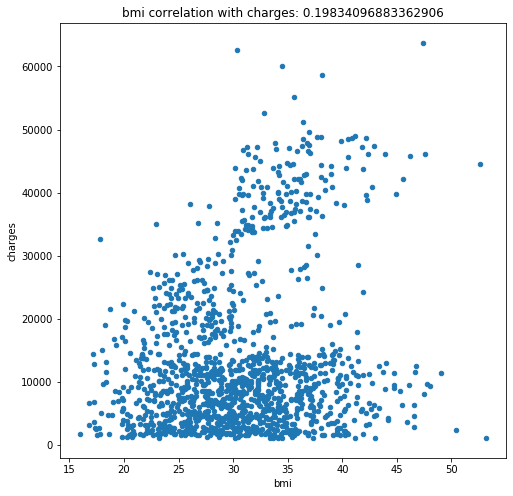

In [12]:
# scatter plot

df.plot.scatter('bmi','charges',figsize=(8,8))
correlation = df.corr()['charges']['bmi']
plt.title('bmi correlation with charges: '+str(correlation))
plt.show();

In [18]:
from scipy import stats
df[['age','charges']].describe()
ttest,pval = stats.ttest_rel(df['age'], df['charges'])
print(pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

TypeError: 'numpy.float64' object is not callable

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   region     1338 non-null   object 
 6   charges    1338 non-null   float64
 7   age_group  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


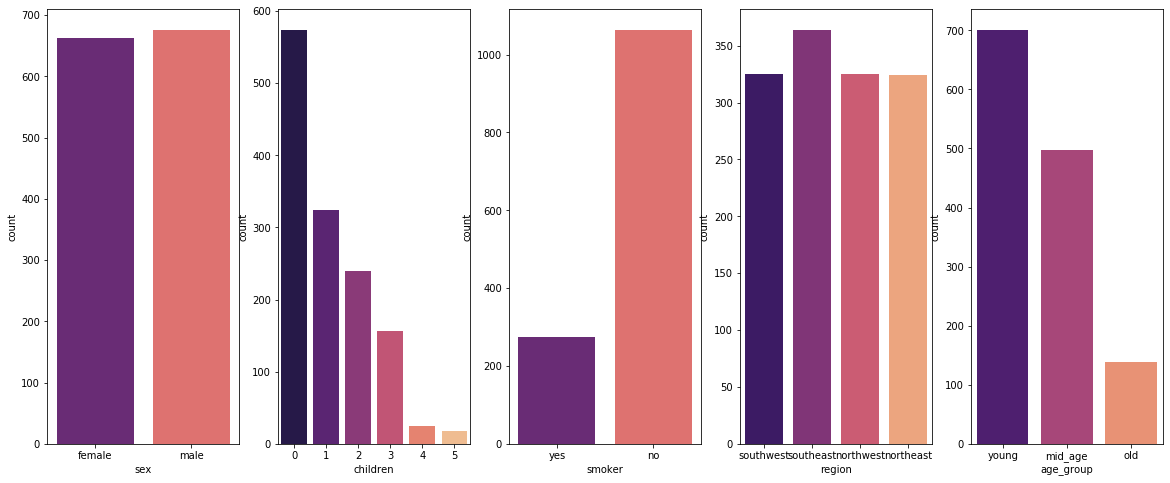

In [20]:
fig,axes=plt.subplots(1,5,figsize=(20,8))
sns.countplot(x='sex',data=df,palette='magma',ax=axes[0])
sns.countplot(x='children',data=df,palette='magma',ax=axes[1])
sns.countplot(x='smoker',data=df,palette='magma',ax=axes[2])
sns.countplot(x='region',data=df,palette='magma',ax=axes[3])
sns.countplot(x='age_group',data=df,palette='magma',ax=axes[4])

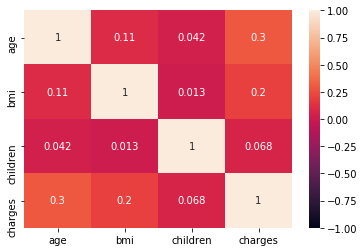

In [21]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

age and bmi are compaaatively more closely related to charges

# multivariate analysis

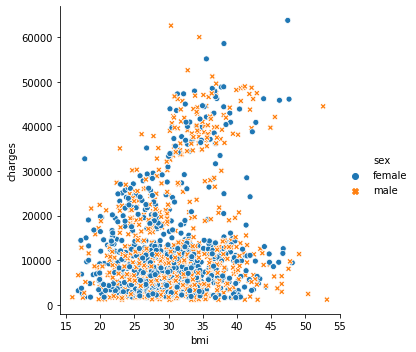

In [19]:
sns.relplot(x='bmi',y='charges',hue='sex',style='sex',data=df)

# data preprocessing

In [22]:
# categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df.sex=le.fit_transform(df.sex)
df.smoker=le.fit_transform(df.smoker)

In [24]:
df1=pd.get_dummies(df.region)
df2=pd.get_dummies(df.age_group)

In [25]:
df3=pd.concat([df,df1,df2],axis='columns')
df3

,age,sex,bmi,children,smoker,region,charges,age_group,northeast,northwest,southeast,southwest,mid_age,old,young
0,19,0,27.900,0,1,southwest,16884.92400,young,0,0,0,1,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,young,0,0,1,0,0,0,1
2,28,1,33.000,3,0,southeast,4449.46200,young,0,0,1,0,0,0,1
3,33,1,22.705,0,0,northwest,21984.47061,young,0,1,0,0,0,0,1
4,32,1,28.880,0,0,northwest,3866.85520,young,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,mid_age,0,1,0,0,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,young,1,0,0,0,0,0,1
1335,18,0,36.850,0,0,southeast,1629.83350,young,0,0,1,0,0,0,1
1336,21,0,25.800,0,0,southwest,2007.94500,young,0,0,0,1,0,0,1


In [26]:
df4=df3.drop(['age','region','age_group'],axis='columns')
df4

,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,mid_age,old,young
0,0,27.900,0,1,16884.92400,0,0,0,1,0,0,1
1,1,33.770,1,0,1725.55230,0,0,1,0,0,0,1
2,1,33.000,3,0,4449.46200,0,0,1,0,0,0,1
3,1,22.705,0,0,21984.47061,0,1,0,0,0,0,1
4,1,28.880,0,0,3866.85520,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,30.970,3,0,10600.54830,0,1,0,0,1,0,0
1334,0,31.920,0,0,2205.98080,1,0,0,0,0,0,1
1335,0,36.850,0,0,1629.83350,0,0,1,0,0,0,1
1336,0,25.800,0,0,2007.94500,0,0,0,1,0,0,1


In [27]:
# scale the data
from sklearn.preprocessing import scale 
mba1=scale(df4.charges)


In [28]:
df4.charges=mba1
df4

,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,mid_age,old,young
0,0,27.900,0,1,0.298584,0,0,0,1,0,0,1
1,1,33.770,1,0,-0.953689,0,0,1,0,0,0,1
2,1,33.000,3,0,-0.728675,0,0,1,0,0,0,1
3,1,22.705,0,0,0.719843,0,1,0,0,0,0,1
4,1,28.880,0,0,-0.776802,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,30.970,3,0,-0.220551,0,1,0,0,1,0,0
1334,0,31.920,0,0,-0.914002,1,0,0,0,0,0,1
1335,0,36.850,0,0,-0.961596,0,0,1,0,0,0,1
1336,0,25.800,0,0,-0.930362,0,0,0,1,0,0,1


In [29]:
X=df4.drop('charges',axis='columns')
X

,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,mid_age,old,young
0,0,27.900,0,1,0,0,0,1,0,0,1
1,1,33.770,1,0,0,0,1,0,0,0,1
2,1,33.000,3,0,0,0,1,0,0,0,1
3,1,22.705,0,0,0,1,0,0,0,0,1
4,1,28.880,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,1,30.970,3,0,0,1,0,0,1,0,0
1334,0,31.920,0,0,1,0,0,0,0,0,1
1335,0,36.850,0,0,0,0,1,0,0,0,1
1336,0,25.800,0,0,0,0,0,1,0,0,1


In [30]:
y=df4.charges
y

0       0.298584
1      -0.953689
2      -0.728675
3       0.719843
4      -0.776802
          ...   
1333   -0.220551
1334   -0.914002
1335   -0.961596
1336   -0.930362
1337    1.311053
Name: charges, Length: 1338, dtype: float64

In [31]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print=('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))
print

'Training Set: 936 rows\nTest Set: 402 rows'

In [58]:
# Fit a linear regression model on the training set
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)

mse=metrics. mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics. mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print=("MSE:",mse,"\nRMSE:",rmse,"\nR2:",r2)
print

('MSE:',
 0.23407871174488998,
 '\nRMSE:',
 0.48381681631056395,
 '\nR2:',
 0.7848958609551553)

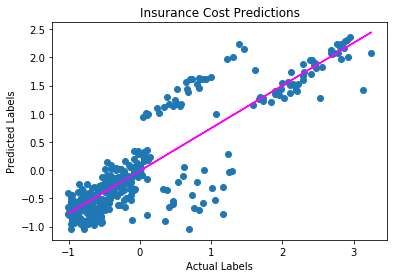

In [57]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Cost Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [62]:
model = Lasso().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
#print("MSE:", mse)
rmse = np.sqrt(mse)
#print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print=("MSE:",mse,"\nRMSE:",rmse,"\nR2:",r2)
print



('MSE:',
 1.0808900851842878,
 '\nRMSE:',
 1.0396586387773092,
 '\nR2:',
 0.006727568506661896)

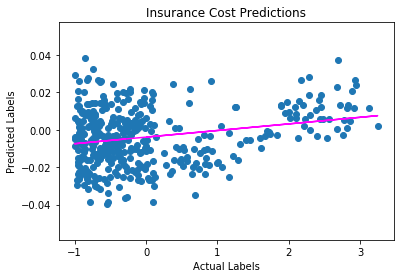

In [63]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Cost Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [65]:
# Fit a decision tree model on the training set
model = DecisionTreeRegressor().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
#print("MSE:", mse)
rmse = np.sqrt(mse)
#print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print=("MSE:",mse,"\nRMSE:",rmse,"\nR2:",r2)
print

('MSE:',
 0.37924529034325843,
 '\nRMSE:',
 0.615828945684805,
 '\nR2:',
 0.6514965796846768)

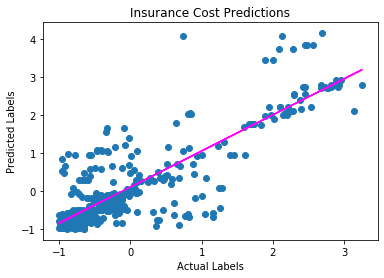

In [66]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Cost Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [69]:
# Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
#print("MSE:", mse)
rmse = np.sqrt(mse)
#print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
#print("R2:", r2)
print=("MSE:",mse,"\nRMSE:",rmse,"\nR2:",r2)
print

('MSE:',
 0.18393620327679638,
 '\nRMSE:',
 0.4288778419046575,
 '\nR2:',
 0.8309737850567415)

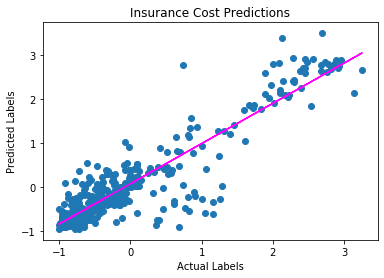

In [70]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Cost Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [75]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
#print("MSE:", mse)
rmse = np.sqrt(mse)
#print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
#print("R2:", r2)
print=("MSE:",mse,"\nRMSE:",rmse,"\nR2:",r2)
print

('MSE:',
 0.13662931324202643,
 '\nRMSE:',
 0.36963402608800294,
 '\nR2:',
 0.8744459478004792)

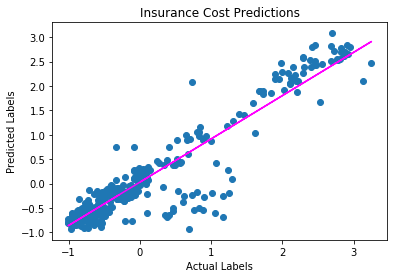

In [72]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Cost Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [84]:
# import Keras Libraries 
import keras
import tensorflow

In [83]:
from keras.models import Sequential
from keras.layers import Dense

In [85]:
model=Sequential()

In [87]:
X_train.shape[1]

11

In [88]:
model.add(Dense(input_dim=X_train.shape[1],kernel_initializer="random_uniform",activation="relu",units=6))

In [89]:
model.add(Dense(kernel_initializer="random_uniform",activation="sigmoid",units=1))

In [90]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [95]:
train_history = model.fit(X_train,y_train,epochs=50,batch_size=16)

Epoch 1/50
59/59 [==============================] - 0s 741us/step - loss: -3.4937 - accuracy: 0.0000e+00
Epoch 2/50
59/59 [==============================] - 0s 735us/step - loss: -3.6596 - accuracy: 0.0000e+00
Epoch 3/50
59/59 [==============================] - 0s 707us/step - loss: -3.8390 - accuracy: 0.0000e+00
Epoch 4/50
59/59 [==============================] - 0s 724us/step - loss: -4.0207 - accuracy: 0.0000e+00
Epoch 5/50
59/59 [==============================] - 0s 707us/step - loss: -4.2006 - accuracy: 0.0000e+00
Epoch 6/50
59/59 [==============================] - 0s 676us/step - loss: -4.3865 - accuracy: 0.0000e+00
Epoch 7/50
59/59 [==============================] - 0s 707us/step - loss: -4.5766 - accuracy: 0.0000e+00
Epoch 8/50
59/59 [==============================] - 0s 696us/step - loss: -4.7821 - accuracy: 0.0000e+00
Epoch 9/50
59/59 [==============================] - 0s 724us/step - loss: -4.9747 - accuracy: 0.0000e+00
Epoch 10/50
59/59 [==============================] - 0s

In [101]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
#print("MSE:", mse)
rmse = np.sqrt(mse)
#print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print=("MSE:",mse,"\nRMSE:",rmse,"\nR2:",r2)
print

('MSE:',
 0.8944745832893606,
 '\nRMSE:',
 0.9457666642937679,
 '\nR2:',
 0.17803210850866946)